In [1]:
import pandas as pd
import pm4py

from pm4py.objects.conversion.log import converter as log_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.bpmn import visualizer as bpmn_visualizer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
import pm4py.convert as conv

import sys

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')

In [2]:
helpdesk_log_path = "../../../../probabilistic_suffix_prediction_dev/data/helpdesk.csv"  

sepsis_log_path = "../../../../../evaluation_results/data/Sepsis.csv" 

  case:concept:name           concept:name      time:timestamp
0            Case 1     Assign seriousness 2012-10-09 14:50:17
1            Case 1  Take in charge ticket 2012-10-09 14:51:01
2            Case 1  Take in charge ticket 2012-10-12 15:02:56
3            Case 1         Resolve ticket 2012-10-25 11:54:26
4            Case 1                 Closed 2012-11-09 12:54:39
5            Case 2     Assign seriousness 2012-04-03 08:55:38
6            Case 2  Take in charge ticket 2012-04-03 08:55:53
7            Case 2         Resolve ticket 2012-04-05 09:15:52
8            Case 2                 Closed 2012-05-19 09:00:28
9            Case 3     Assign seriousness 2010-10-29 10:14:06
<class 'pm4py.objects.log.obj.EventLog'>


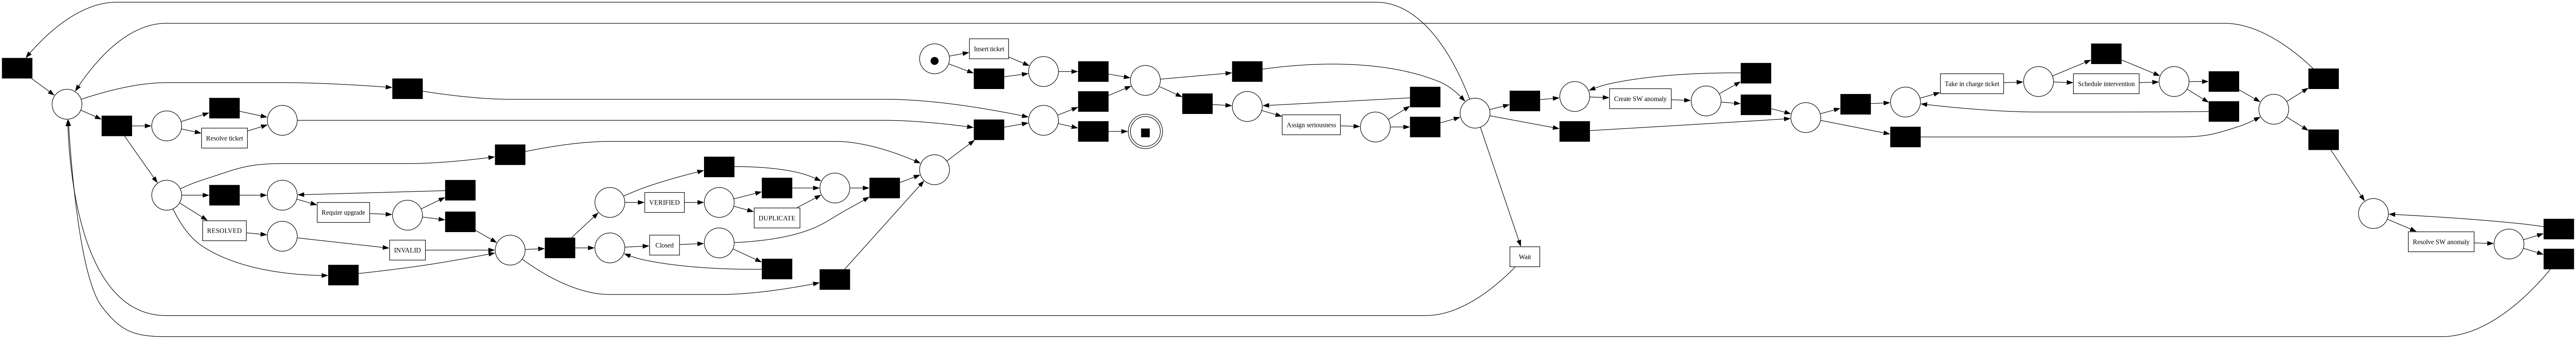

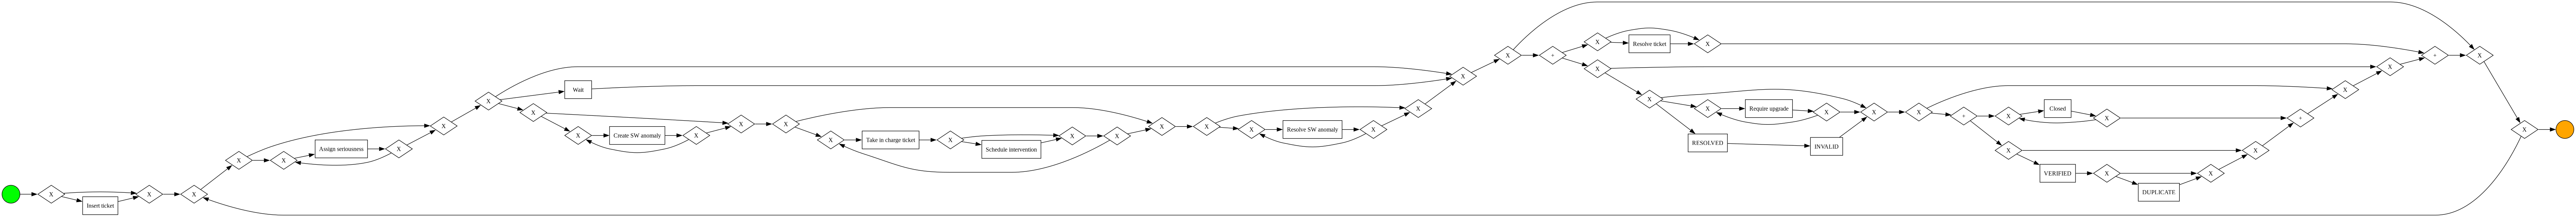

In [3]:
df = pd.read_csv(helpdesk_log_path)

new_df = pd.DataFrame(columns=['case:concept:name', 'concept:name', 'time:timestamp'])

new_df["case:concept:name"] = df["CaseID"].astype(str)
new_df["concept:name"] = df["Activity"].astype(str)

# Optional: Ensure timestamp is parsed correctly
df["CompleteTimestamp"] = pd.to_datetime(df["CompleteTimestamp"])
new_df['time:timestamp'] = pd.to_datetime(df["CompleteTimestamp"])

print(new_df.head(10))

# Step 2: Convert to PM4Py EventLog object
event_log = log_converter.apply(new_df, variant=log_converter.Variants.TO_EVENT_LOG)

print(type(event_log))

# Step 3: Apply Inductive Miner
net, im, fm = pm4py.discover_petri_net_inductive(
    event_log,
    multi_processing=False,
    noise_threshold=0.0,
    activity_key="concept:name",
    timestamp_key="time:timestamp",
    case_id_key="case:concept:name",
    disable_fallthroughs=False
)

# Step 4: Visualize Petri net
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

tree = inductive_miner.apply(
    event_log,
    parameters={"noise_threshold": 1.0}
)

bpmn = conv.convert_to_bpmn(tree)
gviz_bpmn = bpmn_visualizer.apply(bpmn)
bpmn_visualizer.view(gviz_bpmn)


  case:concept:name      concept:name      time:timestamp
0                 A   ER Registration 2014-10-22 11:15:41
1                 A        Leucocytes 2014-10-22 11:27:00
2                 A               CRP 2014-10-22 11:27:00
3                 A        LacticAcid 2014-10-22 11:27:00
4                 A         ER Triage 2014-10-22 11:33:37
5                 A  ER Sepsis Triage 2014-10-22 11:34:00
6                 A         IV Liquid 2014-10-22 14:03:47
7                 A    IV Antibiotics 2014-10-22 14:03:47
8                 A      Admission NC 2014-10-22 14:13:19
9                 A               CRP 2014-10-24 09:00:00
<class 'pm4py.objects.log.obj.EventLog'>


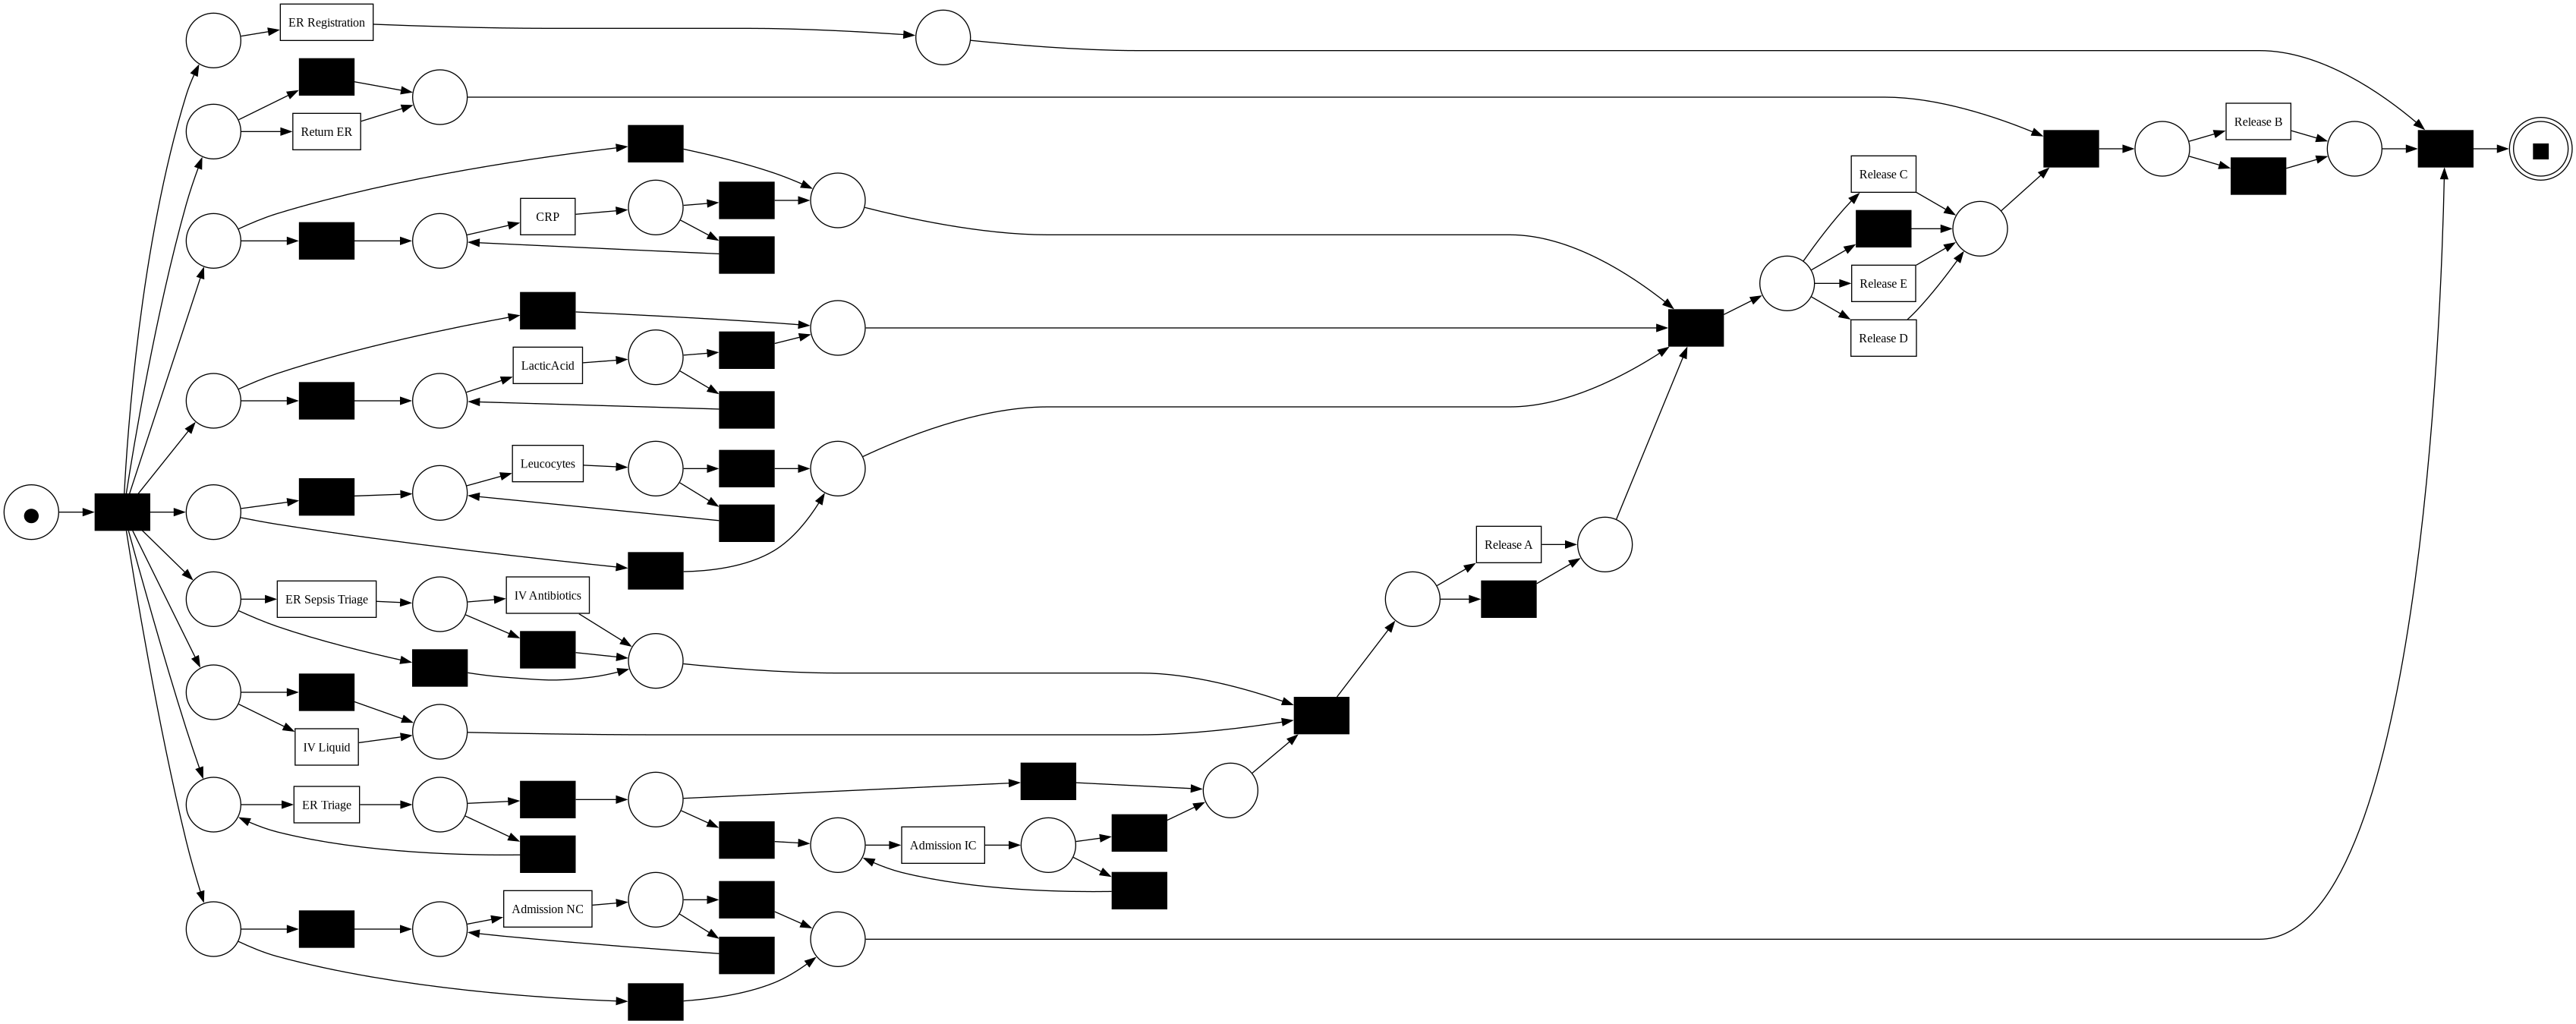

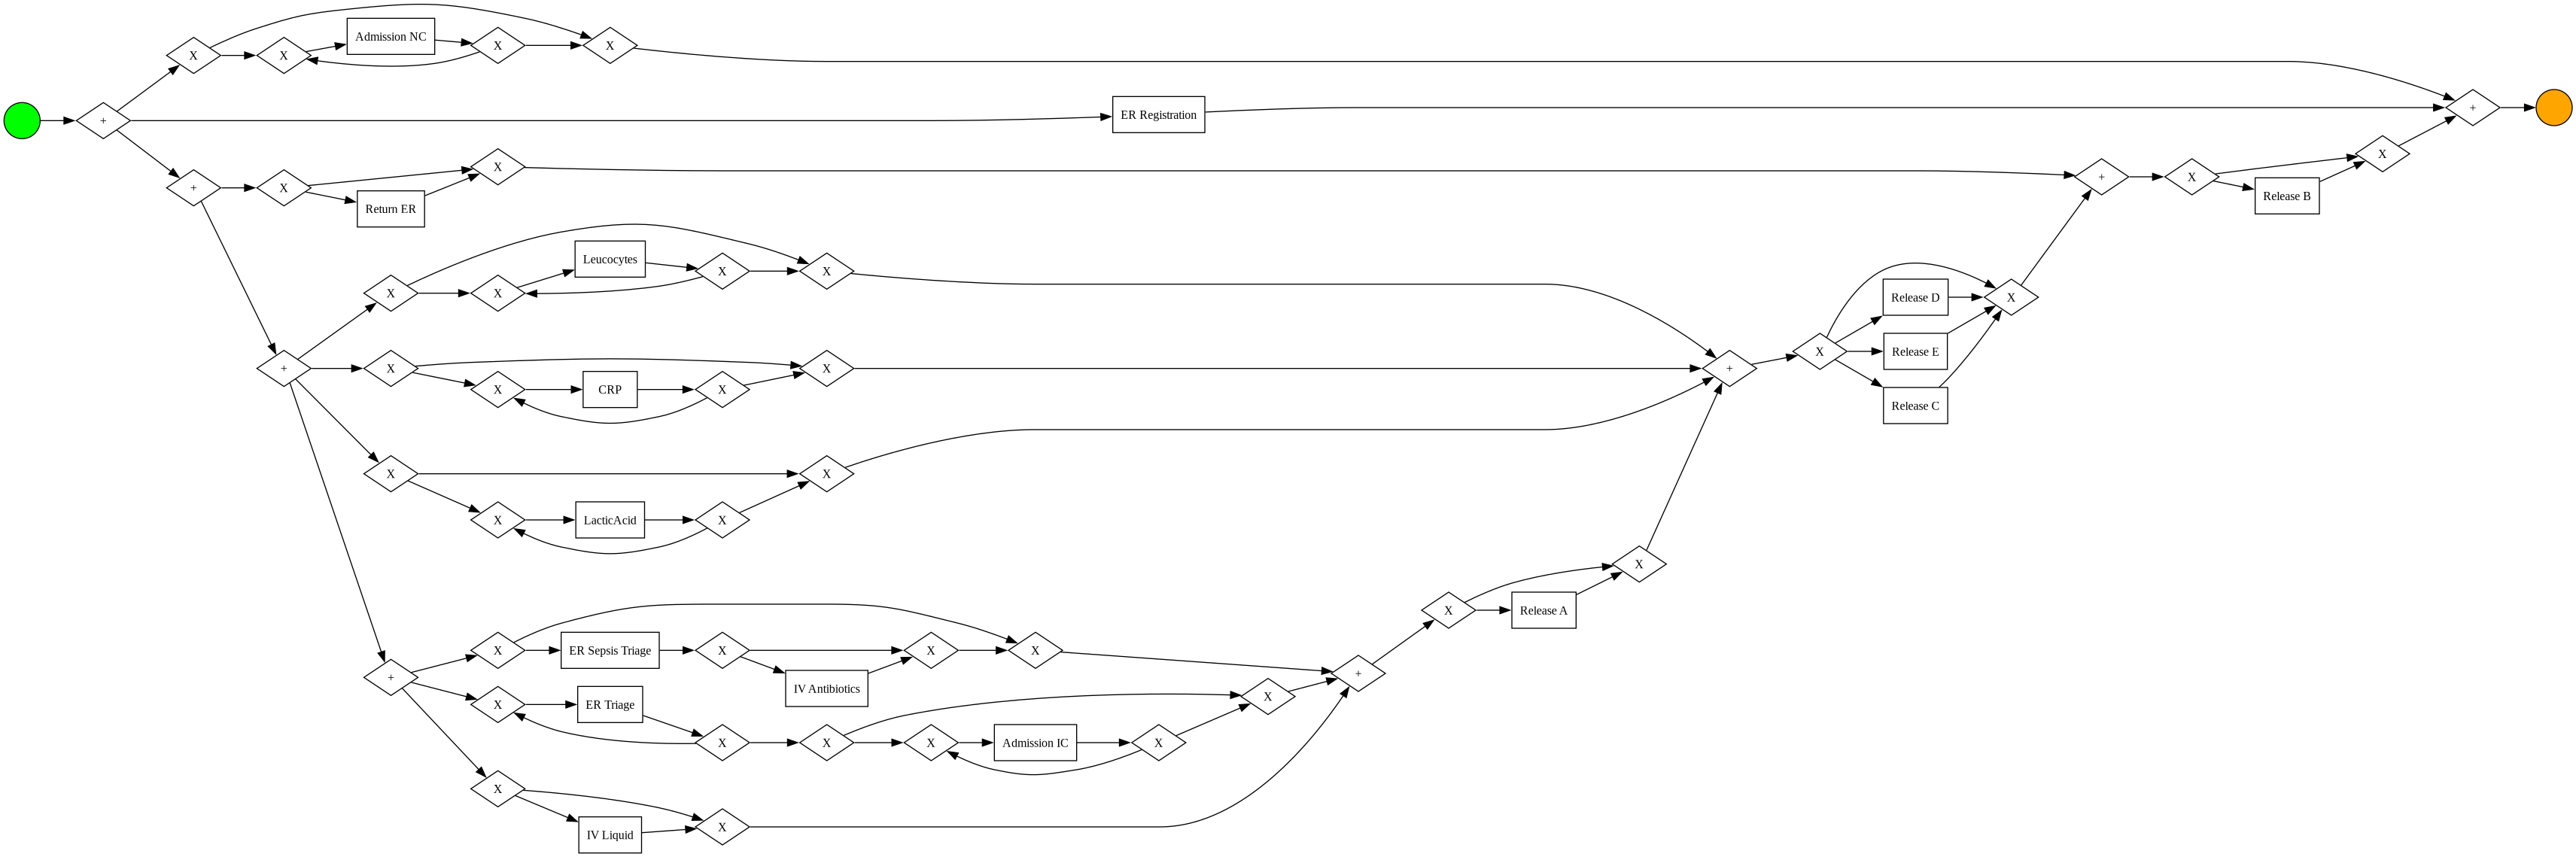

In [4]:
df = pd.read_csv(sepsis_log_path)

new_df = pd.DataFrame(columns=['case:concept:name', 'concept:name', 'time:timestamp'])

new_df["case:concept:name"] = df["case:concept:name"].astype(str)
new_df["concept:name"] = df["concept:name"].astype(str)

# Optional: Ensure timestamp is parsed correctly
df["time:timestamp"] = pd.to_datetime(df["time:timestamp"])
new_df['time:timestamp'] = pd.to_datetime(df["time:timestamp"])

print(new_df.head(10))

# Step 2: Convert to PM4Py EventLog object
event_log = log_converter.apply(new_df, variant=log_converter.Variants.TO_EVENT_LOG)

print(type(event_log))

# Step 3: Apply Inductive Miner
net, im, fm = pm4py.discover_petri_net_inductive(
    event_log,
    multi_processing=False,
    noise_threshold=0.0,
    activity_key="concept:name",
    timestamp_key="time:timestamp",
    case_id_key="case:concept:name",
    disable_fallthroughs=False
)

# Step 4: Visualize Petri net
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)

tree = inductive_miner.apply(
    event_log,
    parameters={"noise_threshold": 0.0}
)

bpmn = conv.convert_to_bpmn(tree)
gviz_bpmn = bpmn_visualizer.apply(bpmn)
bpmn_visualizer.view(gviz_bpmn)